In [24]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

pd.set_option('display.max_colwidth', None)

# Read and preprocess data

In [2]:
raw_provinces = [ { "nama": "ACEH", "id": 100054, "kode": "11", "tingkat": 1 }, { "nama": "BALI", "id": 191103, "kode": "51", "tingkat": 1 }, { "nama": "BANTEN", "id": 191100, "kode": "36", "tingkat": 1 }, { "nama": "BENGKULU", "id": 191092, "kode": "17", "tingkat": 1 }, { "nama": "DAERAH ISTIMEWA YOGYAKARTA", "id": 191098, "kode": "34", "tingkat": 1 }, { "nama": "DKI JAKARTA", "id": 191095, "kode": "31", "tingkat": 1 }, { "nama": "GORONTALO", "id": 191053, "kode": "75", "tingkat": 1 }, { "nama": "JAMBI", "id": 191089, "kode": "15", "tingkat": 1 }, { "nama": "JAWA BARAT", "id": 191096, "kode": "32", "tingkat": 1 }, { "nama": "JAWA TENGAH", "id": 191097, "kode": "33", "tingkat": 1 }, { "nama": "JAWA TIMUR", "id": 191099, "kode": "35", "tingkat": 1 }, { "nama": "KALIMANTAN BARAT", "id": 191101, "kode": "61", "tingkat": 1 }, { "nama": "KALIMANTAN SELATAN", "id": 191106, "kode": "63", "tingkat": 1 }, { "nama": "KALIMANTAN TENGAH", "id": 191102, "kode": "62", "tingkat": 1 }, { "nama": "KALIMANTAN TIMUR", "id": 191107, "kode": "64", "tingkat": 1 }, { "nama": "KALIMANTAN UTARA", "id": 191108, "kode": "65", "tingkat": 1 }, { "nama": "KEPULAUAN BANGKA BELITUNG", "id": 191094, "kode": "19", "tingkat": 1 }, { "nama": "KEPULAUAN RIAU", "id": 191091, "kode": "21", "tingkat": 1 }, { "nama": "LAMPUNG", "id": 191093, "kode": "18", "tingkat": 1 }, { "nama": "Luar Negeri", "id": 200001, "kode": "99", "tingkat": 1 }, { "nama": "MALUKU", "id": 191115, "kode": "81", "tingkat": 1 }, { "nama": "MALUKU UTARA", "id": 191116, "kode": "82", "tingkat": 1 }, { "nama": "NUSA TENGGARA BARAT", "id": 191104, "kode": "52", "tingkat": 1 }, { "nama": "NUSA TENGGARA TIMUR", "id": 191105, "kode": "53", "tingkat": 1 }, { "nama": "P A P U A", "id": 191117, "kode": "91", "tingkat": 1 }, { "nama": "PAPUA BARAT", "id": 191118, "kode": "92", "tingkat": 1 }, { "nama": "PAPUA BARAT DAYA", "id": 191121, "kode": "96", "tingkat": 1 }, { "nama": "PAPUA PEGUNUNGAN", "id": 191120, "kode": "95", "tingkat": 1 }, { "nama": "PAPUA SELATAN", "id": 191114, "kode": "93", "tingkat": 1 }, { "nama": "PAPUA TENGAH", "id": 191119, "kode": "94", "tingkat": 1 }, { "nama": "RIAU", "id": 191088, "kode": "14", "tingkat": 1 }, { "nama": "SULAWESI BARAT", "id": 191113, "kode": "76", "tingkat": 1 }, { "nama": "SULAWESI SELATAN", "id": 191111, "kode": "73", "tingkat": 1 }, { "nama": "SULAWESI TENGAH", "id": 191110, "kode": "72", "tingkat": 1 }, { "nama": "SULAWESI TENGGARA", "id": 191112, "kode": "74", "tingkat": 1 }, { "nama": "SULAWESI UTARA", "id": 191109, "kode": "71", "tingkat": 1 }, { "nama": "SUMATERA BARAT", "id": 191087, "kode": "13", "tingkat": 1 }, { "nama": "SUMATERA SELATAN", "id": 191090, "kode": "16", "tingkat": 1 }, { "nama": "SUMATERA UTARA", "id": 191086, "kode": "12", "tingkat": 1 }]

provinces = {}
for x in raw_provinces:
    provinces[x['kode']] = x['nama']

In [5]:
def read_data(filename):
    data = []
    with open(filename, 'r') as f:
        for step, x in enumerate(f):
            x = json.loads(x)
            paslon_1 = np.nan
            paslon_2 = np.nan
            paslon_3 = np.nan

            if x['data']['chart'] is not None and '100025' in x['data']['chart']:
                paslon_1 = x['data']['chart']['100025']

            if x['data']['chart'] is not None and '100026' in x['data']['chart']:
                paslon_2 = x['data']['chart']['100026']

            if x['data']['chart'] is not None and '100027' in x['data']['chart']:
                paslon_3 = x['data']['chart']['100027']


            suara_sah = np.nan
            suara_total = np.nan
            pemilih_dpt_j = np.nan
            pemilih_dpt_l = np.nan
            pemilih_dpt_p = np.nan
            pengguna_dpt_j = np.nan
            pengguna_dpt_l = np.nan
            pengguna_dpt_p = np.nan
            pengguna_dptb_j = np.nan
            pengguna_dptb_l = np.nan
            pengguna_dptb_p = np.nan
            suara_tidak_sah = np.nan
            pengguna_total_j = np.nan
            pengguna_total_l = np.nan
            pengguna_total_p = np.nan
            pengguna_non_dpt_j = np.nan
            pengguna_non_dpt_l = np.nan
            pengguna_non_dpt_p = np.nan

            if x['data']['administrasi'] is not None:
                suara_sah = x['data']['administrasi']['suara_sah']
                suara_total = x['data']['administrasi']['suara_total']
                pemilih_dpt_j = x['data']['administrasi']['pemilih_dpt_j']
                pemilih_dpt_l = x['data']['administrasi']['pemilih_dpt_l']
                pemilih_dpt_p = x['data']['administrasi']['pemilih_dpt_p']
                pengguna_dpt_j = x['data']['administrasi']['pengguna_dpt_j']
                pengguna_dpt_l = x['data']['administrasi']['pengguna_dpt_l']
                pengguna_dpt_p = x['data']['administrasi']['pengguna_dpt_p']
                pengguna_dptb_j = x['data']['administrasi']['pengguna_dptb_j']
                pengguna_dptb_l = x['data']['administrasi']['pengguna_dptb_l']
                pengguna_dptb_p = x['data']['administrasi']['pengguna_dptb_p']
                suara_tidak_sah = x['data']['administrasi']['suara_tidak_sah']
                pengguna_total_j = x['data']['administrasi']['pengguna_total_j']
                pengguna_total_l = x['data']['administrasi']['pengguna_total_l']
                pengguna_total_p = x['data']['administrasi']['pengguna_total_p']
                pengguna_non_dpt_j = x['data']['administrasi']['pengguna_non_dpt_j']
                pengguna_non_dpt_l = x['data']['administrasi']['pengguna_non_dpt_l']
                pengguna_non_dpt_p = x['data']['administrasi']['pengguna_non_dpt_p']

            status_suara = x['data']['status_suara']
            status_admin = x['data']['status_adm']
            
            
            data.append({
                'url': x['url'],
                'paslon_1': paslon_1,
                'paslon_2': paslon_2,
                'paslon_3': paslon_3,
                'suara_sah': suara_sah,
                'suara_total': suara_total,
                'pemilih_dpt_j': pemilih_dpt_j,
                'pemilih_dpt_l': pemilih_dpt_l,
                'pemilih_dpt_p': pemilih_dpt_p,
                'pengguna_dpt_j': pengguna_dpt_j,
                'pengguna_dpt_l': pengguna_dpt_l,
                'pengguna_dpt_p': pengguna_dpt_p,
                'pengguna_dptb_j': pengguna_dptb_j,
                'pengguna_dptb_l': pengguna_dptb_l,
                'pengguna_dptb_p': pengguna_dptb_p,
                'suara_tidak_sah': suara_tidak_sah,
                'pengguna_total_j': pengguna_total_j,
                'pengguna_total_l': pengguna_total_l,
                'pengguna_total_p': pengguna_total_p,
                'pengguna_non_dpt_j': pengguna_non_dpt_j,
                'pengguna_non_dpt_l': pengguna_non_dpt_l,
                'pengguna_non_dpt_p': pengguna_non_dpt_p,
                'status_suara': status_suara,
                'status_admin': status_admin,  
            })
    return data


data_18 = read_data('../raw_district_counts_2_18_2024.json')
data_18_df = pd.DataFrame(data_18)
data_20 = read_data('../raw_district_counts_2_20_2024.json')
data_20_df = pd.DataFrame(data_20)

In [6]:
def is_data_inputted(x):
    check_na = x.isna()
    if check_na['paslon_1'] or check_na['paslon_2'] or check_na['paslon_3']:
        return False
    return True


def is_greater_than_dpt(x):
    if x['is_data_inputted'] is False:
        return False

    check_na = x.isna()
    if check_na['suara_sah'] or check_na['suara_tidak_sah'] or check_na['suara_total']:
        return False

    candidate_cnt = x['paslon_1'] + x['paslon_2'] + x['paslon_3']

    return candidate_cnt > x['suara_sah']


def is_count_not_match(x):
    if x['is_data_inputted'] is False:
        return False

    check_na = x.isna()
    if check_na['suara_sah'] or check_na['suara_tidak_sah'] or check_na['suara_total']:
        return False

    return x['suara_sah'] + x['suara_tidak_sah'] != x['suara_total']

def get_province(x):
    province_code = x['url'].split("/")[6]
    return provinces[province_code]


def change_url(x):
    url = x['url'].replace('https://sirekap-obj-data.kpu.go.id/pemilu/hhcw/ppwp/','https://pemilu2024.kpu.go.id/pilpres/hitung-suara/')
    url = url.replace('.json', '')
    return url

    

data_18_df['is_data_inputted'] = data_18_df.apply(lambda x: is_data_inputted(x), axis=1)
data_18_df['is_greater_than_dpt'] = data_18_df.apply(lambda x: is_greater_than_dpt(x), axis=1)
data_18_df['is_count_not_match'] = data_18_df.apply(lambda x: is_count_not_match(x), axis=1)
data_18_df['province'] = data_18_df.apply(lambda x: get_province(x), axis=1)
data_18_df['url'] = data_18_df.apply(lambda x: change_url(x), axis=1)

data_20_df['is_data_inputted'] = data_20_df.apply(lambda x: is_data_inputted(x), axis=1)
data_20_df['is_greater_than_dpt'] = data_20_df.apply(lambda x: is_greater_than_dpt(x), axis=1)
data_20_df['is_count_not_match'] = data_20_df.apply(lambda x: is_count_not_match(x), axis=1)
data_20_df['province'] = data_20_df.apply(lambda x: get_province(x), axis=1)
data_20_df['url'] = data_20_df.apply(lambda x: change_url(x), axis=1)

# Statistik General data di KPU

In [7]:
print(f"Statistik data yang diambil 18 Februari 2024:")
print(f"Jumlah TPS yang sudah terinput: {data_18_df['is_data_inputted'].sum()/len(data_18_df):.2%} ({data_18_df['is_data_inputted'].sum()}\{len(data_18_df)})")

print(f"Statistik data yang diambil 20 Februari 2024:")
print(f"Jumlah TPS yang sudah terinput: {data_20_df['is_data_inputted'].sum()/len(data_20_df):.2%} ({data_20_df['is_data_inputted'].sum()}\{len(data_20_df)})")

Statistik data yang diambil 18 Februari 2024:
Jumlah TPS yang sudah terinput: 52.15% (429296\823236)
Statistik data yang diambil 20 Februari 2024:
Jumlah TPS yang sudah terinput: 59.87% (492869\823236)


# Persentase TPS yang memiliki jumlah suara paslon anomali

TPS anomali adalah TPS yang memiliki jumlah suara ketiga paslon > jumlah suara sah.

NB: Ada beberapa TPS yang tidak memiliki informasi jumlah suara sah. Untuk TPS tersebut, kita anggap tidak anomali

In [8]:
print(f"Statistik data yang diambil 18 Februari 2024:")
cnt_greater_than_dpt = data_18_df['is_greater_than_dpt'].sum()
cnt_inputted_data = data_18_df['is_data_inputted'].sum()
print(f"Jumlah TPS yang memiliki data anomali: {cnt_greater_than_dpt/cnt_inputted_data:.2%} ({cnt_greater_than_dpt}\{cnt_inputted_data})")

print(f"Statistik data yang diambil 20 Februari 2024:")
cnt_greater_than_dpt = data_20_df['is_greater_than_dpt'].sum()
cnt_inputted_data = data_20_df['is_data_inputted'].sum()
print(f"Jumlah TPS yang memiliki data anomali: {cnt_greater_than_dpt/cnt_inputted_data:.2%} ({cnt_greater_than_dpt}\{cnt_inputted_data})")

Statistik data yang diambil 18 Februari 2024:
Jumlah TPS yang memiliki data anomali: 1.41% (6045\429296)
Statistik data yang diambil 20 Februari 2024:
Jumlah TPS yang memiliki data anomali: 1.33% (6558\492869)


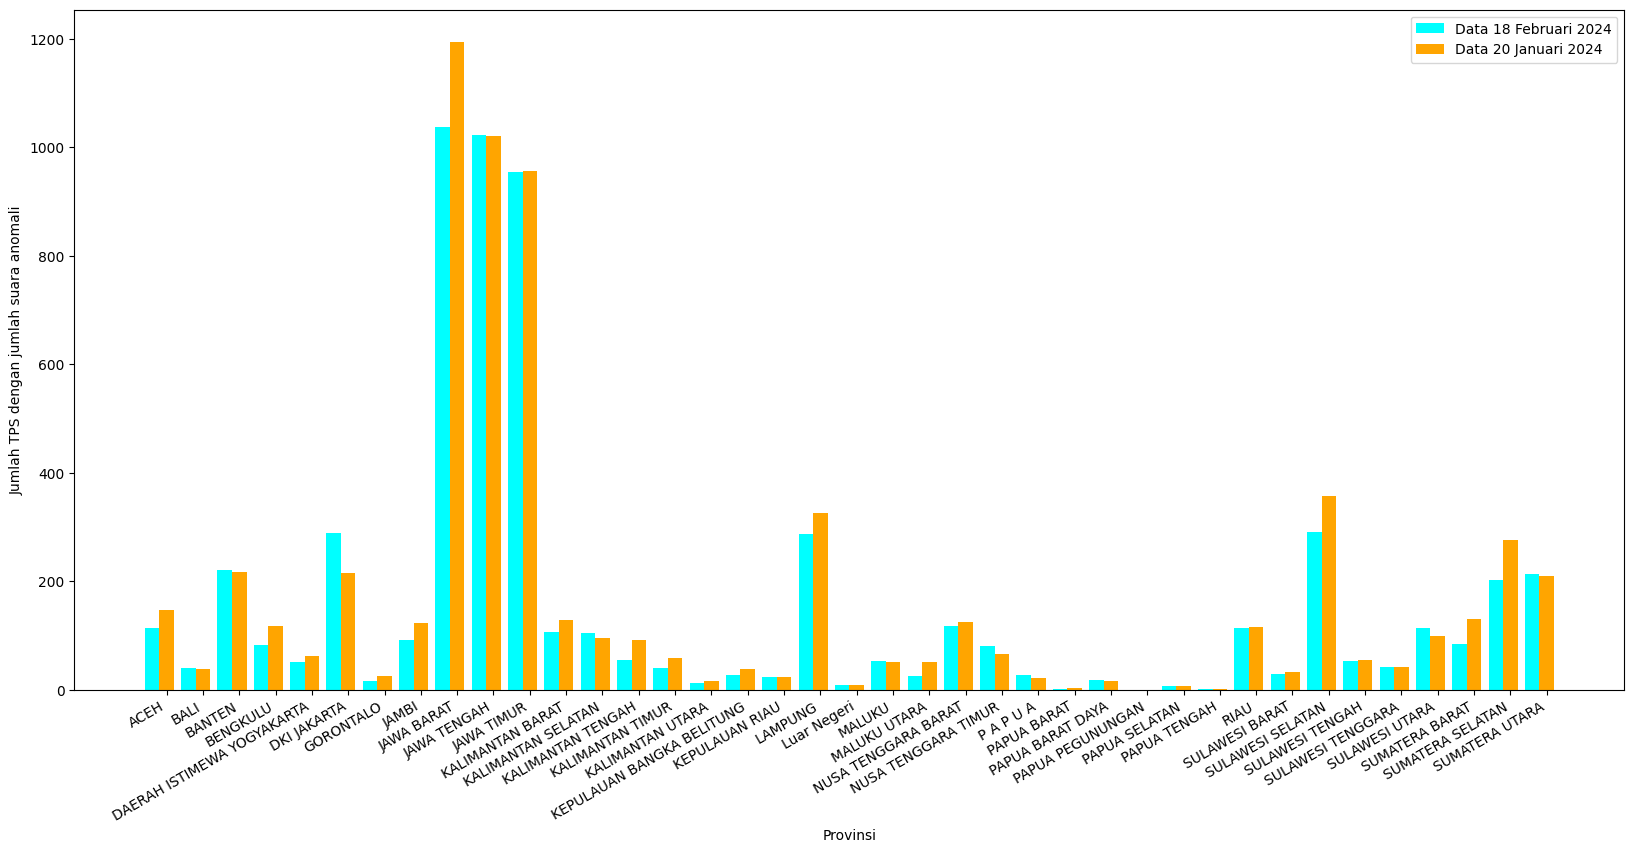

In [9]:
data_before = data_18_df[data_18_df['is_greater_than_dpt'] == True]
data_after = data_20_df[data_20_df['is_greater_than_dpt'] == True]

province_list = [provinces[key] for key in provinces]
y_before = [len(data_before[data_before['province'] == province]) for province in province_list]
y_after = [len(data_after[data_after['province'] == province]) for province in province_list]
x = np.arange(len(province_list))

fig, ax = plt.subplots(1, figsize = (20, 10))
fig.autofmt_xdate()
plt.bar(x-0.4, y_before, 0.4, color='cyan') 
plt.bar(x, y_after, 0.4, color='orange') 
plt.xticks(x, province_list) 
plt.xlabel("Provinsi") 
plt.ylabel("Jumlah TPS dengan jumlah suara anomali") 
plt.legend(["Data 18 Februari 2024", "Data 20 Januari 2024"]) 
plt.show() 

In [25]:
print("Contoh TPS dengan jumlah suara paslon anomali")
data_20_df[data_20_df['is_greater_than_dpt'] == True]

Contoh TPS dengan jumlah suara paslon anomali


,url,paslon_1,paslon_2,paslon_3,suara_sah,suara_total,pemilih_dpt_j,pemilih_dpt_l,pemilih_dpt_p,pengguna_dpt_j,...,pengguna_total_p,pengguna_non_dpt_j,pengguna_non_dpt_l,pengguna_non_dpt_p,status_suara,status_admin,is_data_inputted,is_greater_than_dpt,is_count_not_match,province
190,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/11/1105/110501/1105012017/1105012017004,167.0,43.0,12.0,217.0,222.0,284.0,131.0,153.0,227.0,...,127.0,0.0,0.0,0.0,True,True,True,True,False,ACEH
260,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/11/1105/110502/1105022003/1105022003001,144.0,33.0,3.0,150.0,155.0,175.0,89.0,86.0,155.0,...,76.0,0.0,0.0,0.0,True,True,True,True,False,ACEH
393,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/11/1105/110508/1105082012/1105082012002,165.0,21.0,1.0,184.0,187.0,219.0,106.0,113.0,187.0,...,101.0,0.0,0.0,0.0,True,True,True,True,False,ACEH
412,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/11/1105/110508/1105082025/1105082025002,127.0,42.0,4.0,163.0,165.0,176.0,87.0,89.0,165.0,...,84.0,0.0,0.0,0.0,True,True,True,True,False,ACEH
416,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/11/1105/110508/1105082001/1105082001001,136.0,23.0,602.0,165.0,167.0,170.0,89.0,81.0,165.0,...,80.0,0.0,0.0,0.0,True,True,True,True,False,ACEH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822559,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/12/1212/121208/1212081009/1212081009003,6.0,165.0,21.0,191.0,192.0,234.0,114.0,120.0,179.0,...,99.0,9.0,3.0,6.0,True,True,True,True,False,SUMATERA UTARA
822673,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/12/1212/121201/1212012011/1212012011001,7.0,162.0,44.0,0.0,0.0,204.0,98.0,106.0,204.0,...,111.0,2.0,1.0,1.0,True,True,True,True,False,SUMATERA UTARA
822997,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/12/1212/121224/1212242006/1212242006006,14.0,271.0,24.0,273.0,274.0,221.0,117.0,104.0,159.0,...,82.0,15.0,6.0,9.0,True,True,True,True,False,SUMATERA UTARA
823218,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/12/1212/121210/1212102005/1212102005002,89.0,89.0,39.0,129.0,131.0,192.0,95.0,97.0,128.0,...,63.0,1.0,0.0,1.0,True,True,True,True,False,SUMATERA UTARA


# Persentase TPS yang jumlah suara total TIDAK SAMA dengan jumlah suara sah + jumlah suara tidak sah

In [11]:
print(f"Statistik data yang diambil 18 Februari 2024:")
cnt_count_not_match = data_18_df['is_count_not_match'].sum()
cnt_inputted_data = data_18_df['is_data_inputted'].sum()
print(f"Jumlah TPS yang memiliki jumlah suara tidak sama: {cnt_count_not_match/cnt_inputted_data:.2%} ({cnt_count_not_match}\{cnt_inputted_data})")

print(f"Statistik data yang diambil 20 Februari 2024:")
cnt_count_not_match = data_20_df['is_count_not_match'].sum()
cnt_inputted_data = data_20_df['is_data_inputted'].sum()
print(f"Jumlah TPS yang memiliki jumlah suara tidak sama: {cnt_count_not_match/cnt_inputted_data:.2%} ({cnt_count_not_match}\{cnt_inputted_data})")

Statistik data yang diambil 18 Februari 2024:
Jumlah TPS yang memiliki jumlah suara tidak sama: 0.49% (2110\429296)
Statistik data yang diambil 20 Februari 2024:
Jumlah TPS yang memiliki jumlah suara tidak sama: 0.56% (2743\492869)


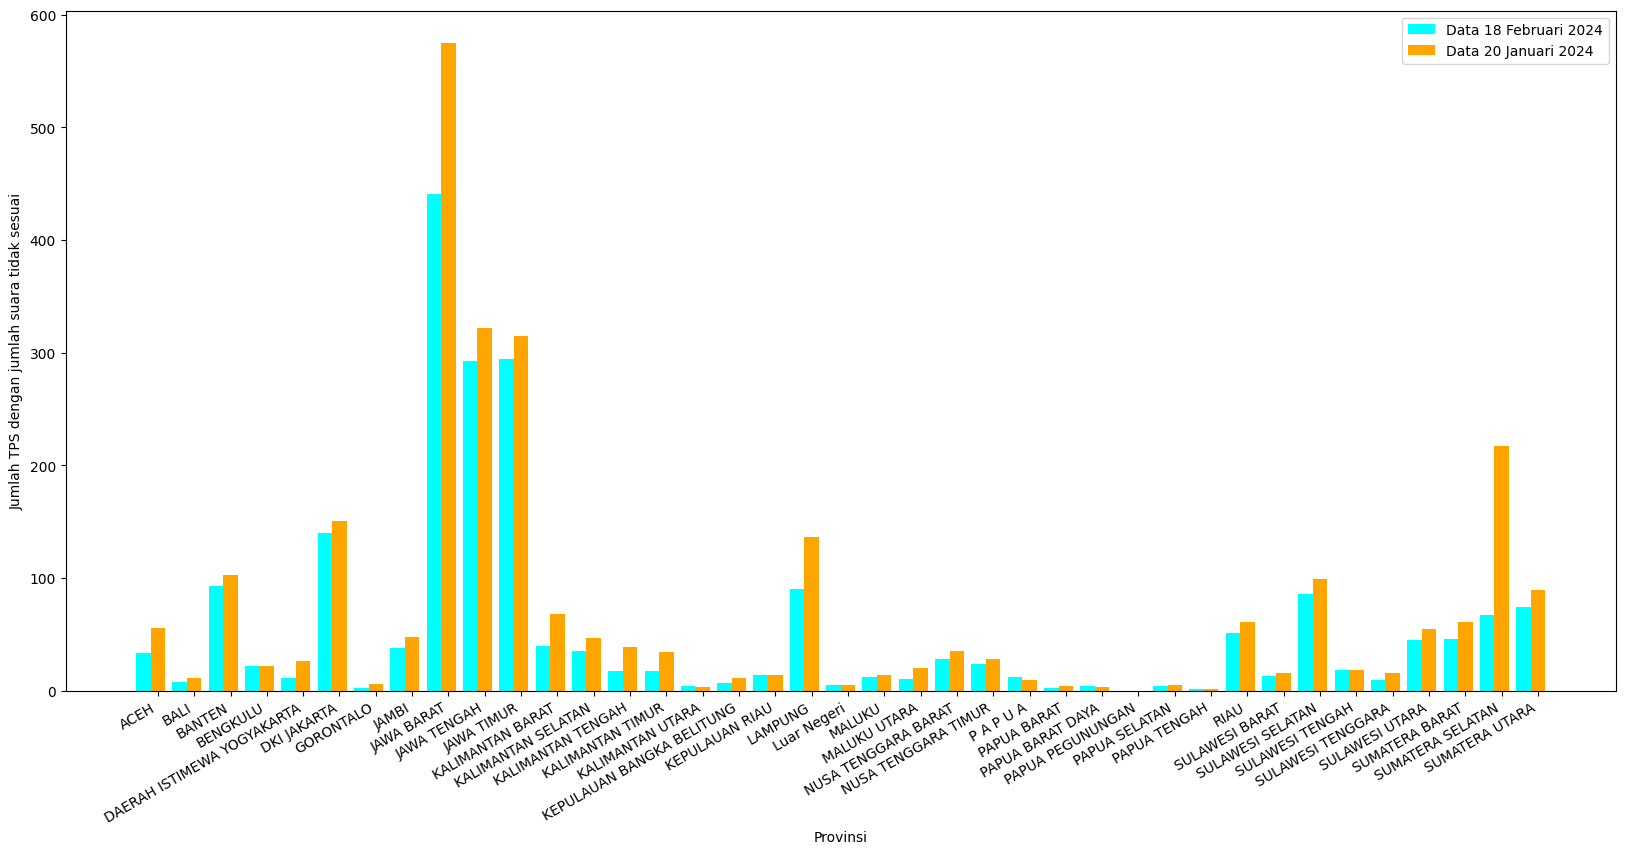

In [12]:
data_before = data_18_df[data_18_df['is_count_not_match'] == True]
data_after = data_20_df[data_20_df['is_count_not_match'] == True]

province_list = [provinces[key] for key in provinces]
y_before = [len(data_before[data_before['province'] == province]) for province in province_list]
y_after = [len(data_after[data_after['province'] == province]) for province in province_list]
x = np.arange(len(province_list))

fig, ax = plt.subplots(1, figsize = (20, 10))
fig.autofmt_xdate()
plt.bar(x-0.4, y_before, 0.4, color='cyan') 
plt.bar(x, y_after, 0.4, color='orange') 
plt.xticks(x, province_list) 
plt.xlabel("Provinsi") 
plt.ylabel("Jumlah TPS dengan jumlah suara tidak sesuai") 
plt.legend(["Data 18 Februari 2024", "Data 20 Januari 2024"]) 
plt.show() 

In [26]:
print("Contoh TPS dengan jumlah suara TIDAK SAMA dengan jumlah suara sah + jumlah suara tidak sah")
data_20_df[data_20_df['is_count_not_match'] == True]

Contoh TPS dengan jumlah suara TIDAK SAMA dengan jumlah suara sah + jumlah suara tidak sah


,url,paslon_1,paslon_2,paslon_3,suara_sah,suara_total,pemilih_dpt_j,pemilih_dpt_l,pemilih_dpt_p,pengguna_dpt_j,...,pengguna_total_p,pengguna_non_dpt_j,pengguna_non_dpt_l,pengguna_non_dpt_p,status_suara,status_admin,is_data_inputted,is_greater_than_dpt,is_count_not_match,province
2033,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/11/1106/110609/1106092012/1106092012018,150.0,52.0,16.0,258.0,220.0,300.0,151.0,149.0,212.0,...,117.0,8.0,4.0,4.0,True,True,True,False,True,ACEH
2080,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/11/1106/110605/1106052018/1106052018001,144.0,13.0,0.0,157.0,10.0,163.0,75.0,88.0,152.0,...,87.0,2.0,2.0,0.0,True,True,True,False,True,ACEH
2236,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/11/1106/110604/1106042045/1106042045002,171.0,17.0,4.0,188.0,183.0,208.0,104.0,104.0,189.0,...,101.0,0.0,0.0,0.0,True,True,True,True,True,ACEH
2246,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/11/1106/110604/1106042003/1106042003002,197.0,22.0,2.0,227.0,335.0,264.0,128.0,136.0,225.0,...,116.0,0.0,0.0,0.0,True,True,True,False,True,ACEH
2274,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/11/1106/110618/1106182003/1106182003002,147.0,32.0,0.0,197.0,182.0,193.0,88.0,105.0,178.0,...,101.0,4.0,2.0,2.0,True,True,True,False,True,ACEH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816107,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/12/1218/121813/1218132010/1218132010006,5.0,55.0,59.0,127.0,124.0,163.0,78.0,85.0,119.0,...,69.0,805.0,1.0,4.0,True,True,True,False,True,SUMATERA UTARA
816699,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/12/1208/120808/1208082003/1208082003001,36.0,151.0,20.0,297.0,213.0,295.0,142.0,153.0,213.0,...,115.0,0.0,0.0,0.0,True,True,True,False,True,SUMATERA UTARA
816763,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/12/1208/120808/1208082016/1208082016001,1.0,92.0,77.0,120.0,625.0,252.0,428.0,424.0,121.0,...,69.0,4.0,802.0,2.0,True,True,True,True,True,SUMATERA UTARA
821999,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/12/1202/120202/1202022010/1202022010002,2.0,244.0,38.0,689.0,799.0,225.0,103.0,122.0,190.0,...,106.0,0.0,0.0,0.0,True,True,True,False,True,SUMATERA UTARA


# Pertambahan paslon 2

In [27]:
df_before = data_18_df[['url', 'province', 'paslon_2', 'is_data_inputted']].copy()
df_after = data_20_df[['paslon_2']].copy().rename(columns={'paslon_2': 'paslon_2_baru'})

df_combine = pd.concat([df_before, df_after], axis=1)

def calculate_changes(x, key='paslon_1'):
    return x[f'{key}_baru'] - x[key]

df_combine['count_changes'] = df_combine.apply(lambda x: calculate_changes(x, 'paslon_2'), axis=1)
df_combine[df_combine['count_changes'] > 0].sort_values('count_changes', ascending=False)

,url,province,paslon_2,is_data_inputted,paslon_2_baru,count_changes
8995,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/11/1108/110814/1108142010/1108142010001,ACEH,22.0,True,822.0,800.0
456893,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/35/3516/351614/3516142007/3516142007010,JAWA TIMUR,184.0,True,789.0,605.0
198842,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/32/3215/321522/3215222007/3215222007021,JAWA BARAT,153.0,True,757.0,604.0
197037,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/32/3215/321524/3215242009/3215242009001,JAWA BARAT,175.0,True,775.0,600.0
177910,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/32/3209/320931/3209312007/3209312007013,JAWA BARAT,145.0,True,745.0,600.0
...,...,...,...,...,...,...
355730,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/33/3306/330613/3306132006/3306132006001,JAWA TENGAH,75.0,True,76.0,1.0
674370,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/14/1471/147110/1471101005/1471101005021,RIAU,105.0,True,106.0,1.0
354752,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/33/3303/330313/3303132009/3303132009025,JAWA TENGAH,72.0,True,73.0,1.0
351434,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/33/3327/332713/3327132007/3327132007018,JAWA TENGAH,95.0,True,96.0,1.0


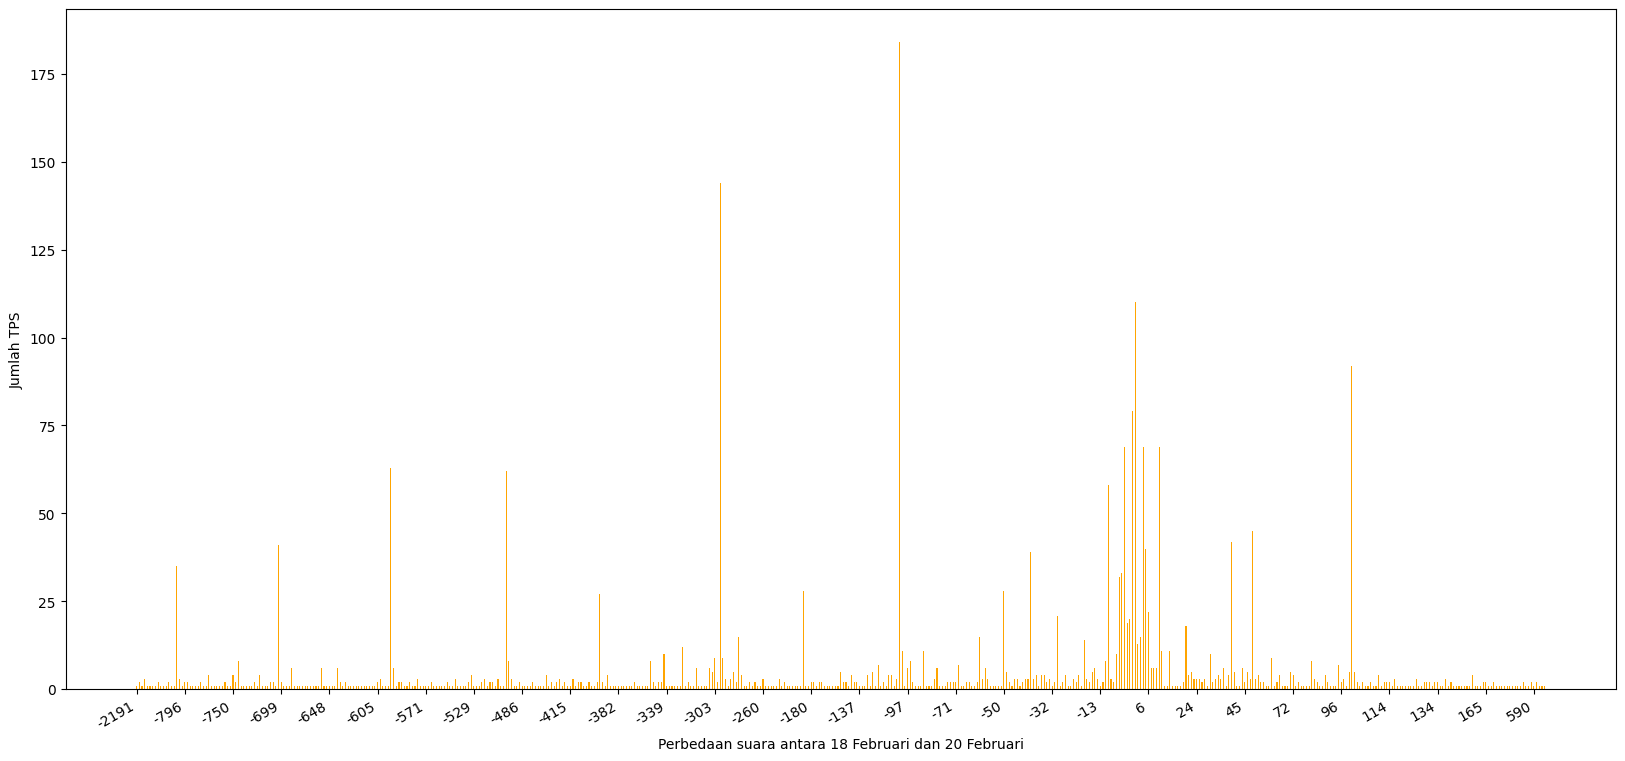

In [28]:
import math
unique_count_changes = [int(x) for x in df_combine['count_changes'].unique() if not math.isnan(x) and x != 0]
unique_count_changes.sort()

y = [len(df_combine[df_combine['count_changes'] == count_change]) for count_change in unique_count_changes]
x = np.arange(len(unique_count_changes))

fig, ax = plt.subplots(1, figsize = (20, 10))
fig.autofmt_xdate()
plt.bar(x, y, 0.4, color='orange') 
plt.xticks(x, unique_count_changes) 
plt.xlabel("Perbedaan suara antara 18 Februari dan 20 Februari") 
plt.ylabel("Jumlah TPS") 
plt.locator_params(axis='x', nbins=30)
plt.show() 

In [29]:
df_combine[df_combine['count_changes'] == 100]

,url,province,paslon_2,is_data_inputted,paslon_2_baru,count_changes
26836,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/51/5171/517104/5171042003/5171042003008,BALI,16.0,True,116.0,100.0
39953,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/36/3674/367401/3674011006/3674011006012,BANTEN,5.0,True,105.0,100.0
39979,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/36/3674/367401/3674011006/3674011006038,BANTEN,22.0,True,122.0,100.0
40625,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/36/3674/367402/3674021001/3674021001015,BANTEN,18.0,True,118.0,100.0
40958,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/36/3674/367407/3674071002/3674071002013,BANTEN,55.0,True,155.0,100.0
...,...,...,...,...,...,...
603829,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/82/8203/820305/8203052005/8203052005005,MALUKU UTARA,104.0,True,204.0,100.0
608403,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/52/5272/527201/5272011003/5272011003010,NUSA TENGGARA BARAT,15.0,True,115.0,100.0
613159,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/52/5202/520209/5202092001/5202092001005,NUSA TENGGARA BARAT,21.0,True,121.0,100.0
682743,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/73/7308/730818/7308182011/7308182011001,SULAWESI SELATAN,58.0,True,158.0,100.0


# Pertambahan paslon 1

In [30]:
df_before = data_18_df[['url', 'province', 'paslon_1', 'is_data_inputted']].copy()
df_after = data_20_df[['paslon_1']].copy().rename(columns={'paslon_1': 'paslon_1_baru'})

df_combine = pd.concat([df_before, df_after], axis=1)

df_combine['count_changes'] = df_combine.apply(lambda x: calculate_changes(x, 'paslon_1'), axis=1)
df_combine[df_combine['count_changes'] > 0].sort_values('count_changes', ascending=False)

,url,province,paslon_1,is_data_inputted,paslon_1_baru,count_changes
456612,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/35/3516/351617/3516172010/3516172010006,JAWA TIMUR,7.0,True,807.0,800.0
420689,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/35/3506/350616/3506162002/3506162002016,JAWA TIMUR,4.0,True,804.0,800.0
135077,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/32/3204/320435/3204352006/3204352006039,JAWA BARAT,26.0,True,825.0,799.0
561862,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/21/2102/210202/2102021001/2102021001010,KEPULAUAN RIAU,62.0,True,842.0,780.0
195713,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/32/3212/321220/3212202005/3212202005008,JAWA BARAT,7.0,True,747.0,740.0
...,...,...,...,...,...,...
321914,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/33/3310/331026/3310262008/3310262008006,JAWA TENGAH,23.0,True,24.0,1.0
316171,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/33/3324/332407/3324072015/3324072015029,JAWA TENGAH,25.0,True,26.0,1.0
615701,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/52/5203/520301/5203012008/5203012008010,NUSA TENGGARA BARAT,15.0,True,16.0,1.0
303986,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/33/3315/331504/3315042012/3315042012044,JAWA TENGAH,5.0,True,6.0,1.0


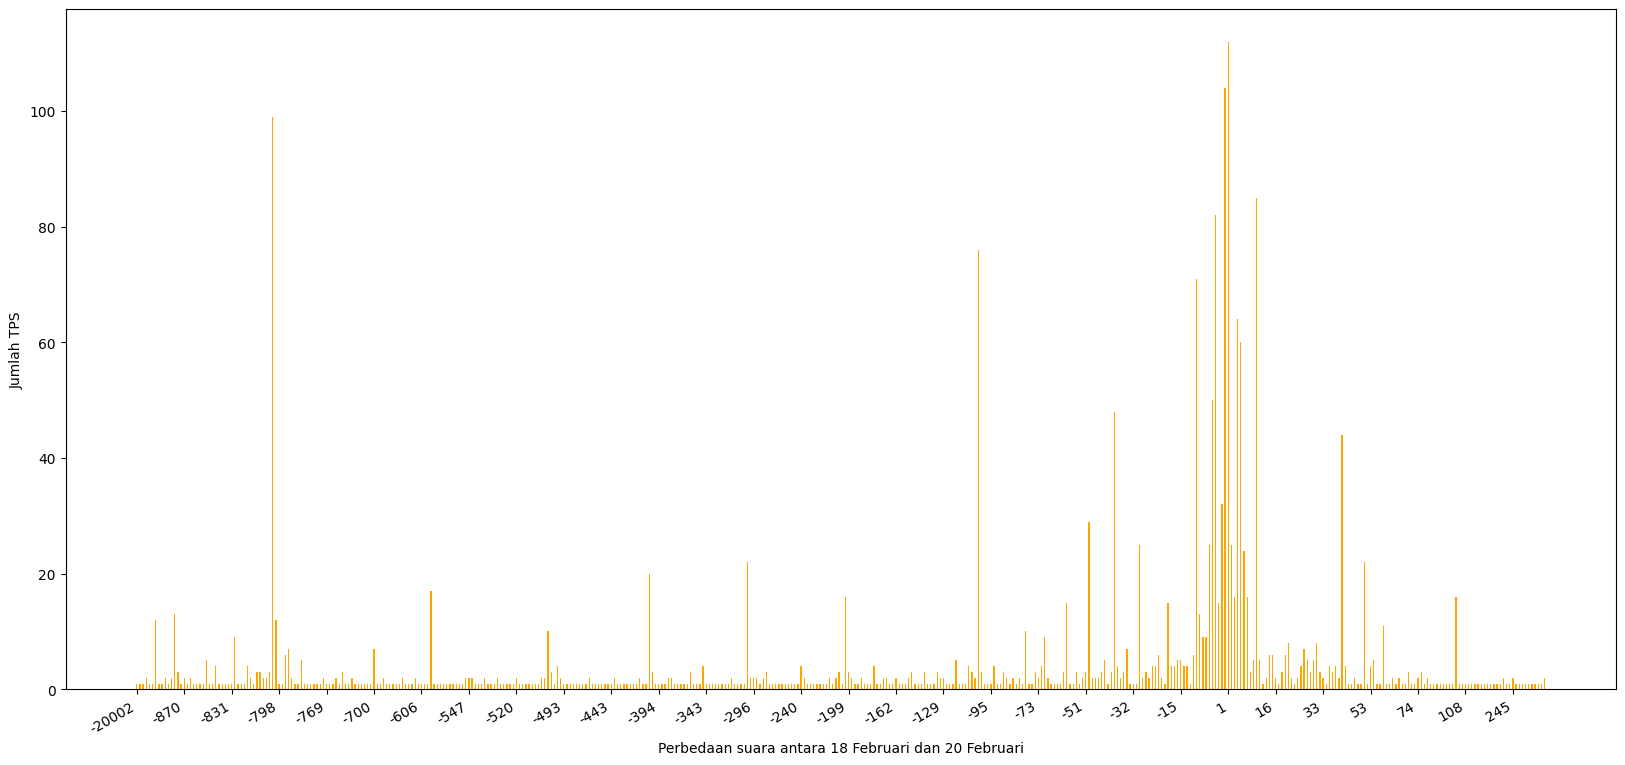

In [31]:
import math
unique_count_changes = [int(x) for x in df_combine['count_changes'].unique() if not math.isnan(x) and x != 0]
unique_count_changes.sort()

y = [len(df_combine[df_combine['count_changes'] == count_change]) for count_change in unique_count_changes]
x = np.arange(len(unique_count_changes))

fig, ax = plt.subplots(1, figsize = (20, 10))
fig.autofmt_xdate()
plt.bar(x, y, 0.4, color='orange') 
plt.xticks(x, unique_count_changes) 
plt.xlabel("Perbedaan suara antara 18 Februari dan 20 Februari") 
plt.ylabel("Jumlah TPS") 
plt.locator_params(axis='x', nbins=30)
plt.show() 

In [32]:
df_combine[df_combine['count_changes'] == 100]

,url,province,paslon_1,is_data_inputted,paslon_1_baru,count_changes
9029,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/11/1108/110814/1108142011/1108142011002,ACEH,170.0,True,270.0,100.0
67880,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/17/1705/170507/1705072012/1705072012003,BENGKULU,19.0,True,119.0,100.0
86797,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/31/3173/317303/3173031004/3173031004047,DKI JAKARTA,35.0,True,135.0,100.0
115340,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/15/1501/150116/1501162039/1501162039003,JAMBI,31.0,True,131.0,100.0
126933,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/32/3204/320413/3204132002/3204132002011,JAWA BARAT,98.0,True,198.0,100.0
135286,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/32/3204/320438/3204382004/3204382004002,JAWA BARAT,70.0,True,170.0,100.0
192450,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/32/3212/321217/3212172003/3212172003001,JAWA BARAT,21.0,True,121.0,100.0
225846,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/32/3276/327602/3276021012/3276021012060,JAWA BARAT,77.0,True,177.0,100.0
225973,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/32/3276/327602/3276021007/3276021007049,JAWA BARAT,44.0,True,144.0,100.0
261236,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/32/3206/320608/3206082007/3206082007008,JAWA BARAT,21.0,True,121.0,100.0


# Pertambahan paslon 3

In [33]:
df_before = data_18_df[['url', 'province', 'paslon_3', 'is_data_inputted']].copy()
df_after = data_20_df[['paslon_3']].copy().rename(columns={'paslon_3': 'paslon_3_baru'})

df_combine = pd.concat([df_before, df_after], axis=1)

df_combine['count_changes'] = df_combine.apply(lambda x: calculate_changes(x, 'paslon_3'), axis=1)
df_combine[df_combine['count_changes'] > 0].sort_values('count_changes', ascending=False)

,url,province,paslon_3,is_data_inputted,paslon_3_baru,count_changes
135077,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/32/3204/320435/3204352006/3204352006039,JAWA BARAT,19.0,True,849.0,830.0
435075,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/35/3578/357810/3578101002/3578101002016,JAWA TIMUR,67.0,True,867.0,800.0
198837,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/32/3215/321522/3215222007/3215222007016,JAWA BARAT,15.0,True,815.0,800.0
198842,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/32/3215/321522/3215222007/3215222007021,JAWA BARAT,15.0,True,815.0,800.0
451315,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/35/3507/350713/3507132003/3507132003005,JAWA TIMUR,55.0,True,855.0,800.0
...,...,...,...,...,...,...
459073,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/35/3516/351611/3516112014/3516112014013,JAWA TIMUR,45.0,True,46.0,1.0
459832,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/35/3518/351810/3518102002/3518102002002,JAWA TIMUR,65.0,True,66.0,1.0
465388,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/35/3521/352101/3521012012/3521012012003,JAWA TIMUR,58.0,True,59.0,1.0
466534,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/35/3501/350104/3501042009/3501042009005,JAWA TIMUR,8.0,True,9.0,1.0


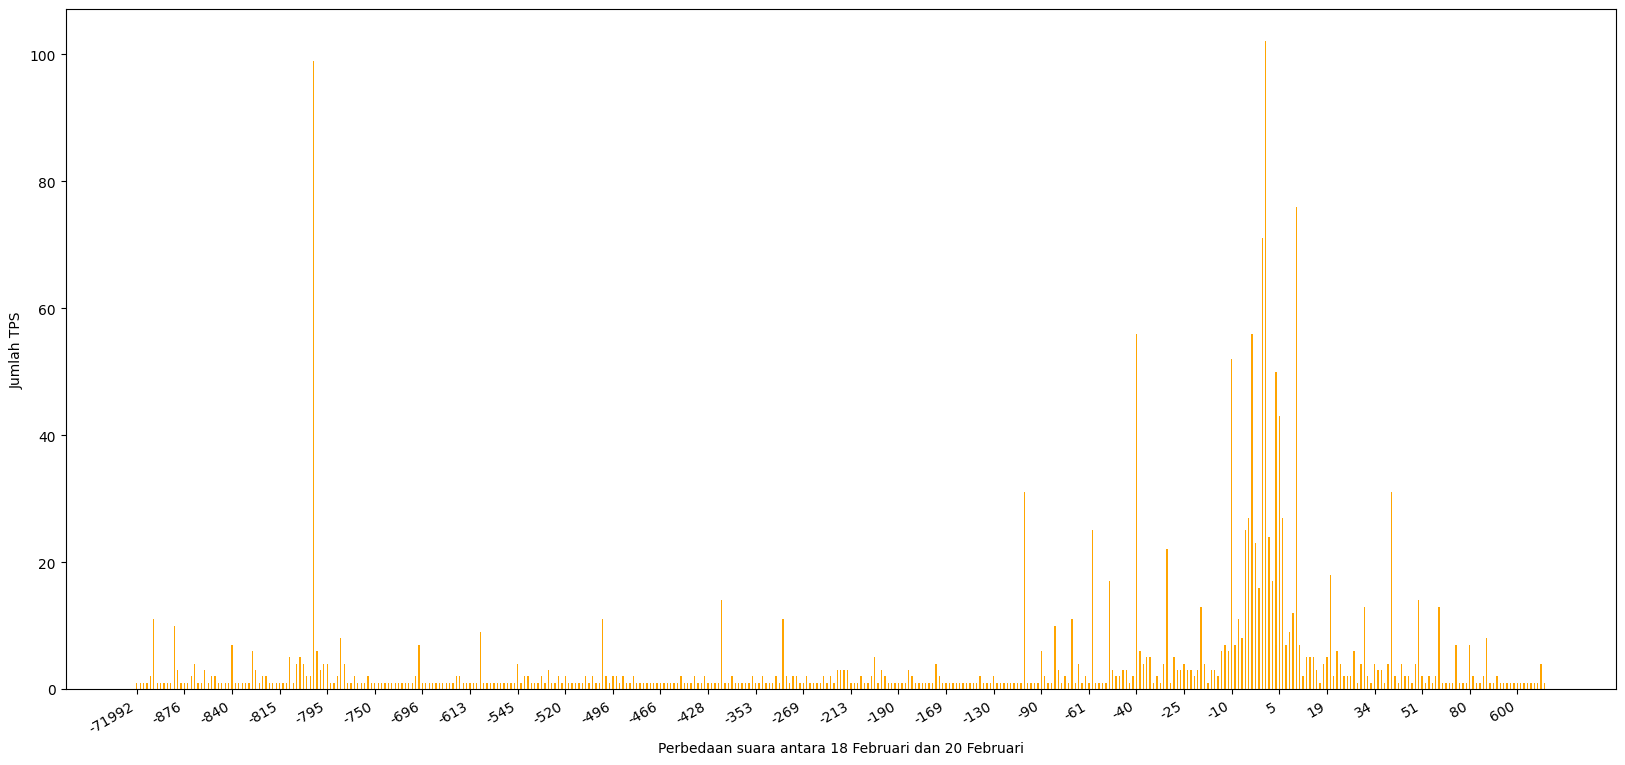

In [34]:
import math
unique_count_changes = [int(x) for x in df_combine['count_changes'].unique() if not math.isnan(x) and x != 0]
unique_count_changes.sort()

y = [len(df_combine[df_combine['count_changes'] == count_change]) for count_change in unique_count_changes]
x = np.arange(len(unique_count_changes))

fig, ax = plt.subplots(1, figsize = (20, 10))
fig.autofmt_xdate()
plt.bar(x, y, 0.4, color='orange') 
plt.xticks(x, unique_count_changes) 
plt.xlabel("Perbedaan suara antara 18 Februari dan 20 Februari") 
plt.ylabel("Jumlah TPS") 
plt.locator_params(axis='x', nbins=30)
plt.show() 

In [35]:
df_combine[df_combine['count_changes'] == 100]

,url,province,paslon_3,is_data_inputted,paslon_3_baru,count_changes
75767,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/34/3401/340112/3401122001/3401122001027,DAERAH ISTIMEWA YOGYAKARTA,34.0,True,134.0,100.0
150585,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/32/3201/320105/3201052003/3201052003027,JAWA BARAT,12.0,True,112.0,100.0
361286,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/33/3322/332201/3322012003/3322012003002,JAWA TENGAH,27.0,True,127.0,100.0
375224,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/33/3323/332313/3323132003/3323132003005,JAWA TENGAH,80.0,True,180.0,100.0
495151,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/35/3503/350304/3503042006/3503042006020,JAWA TIMUR,81.0,True,181.0,100.0
495968,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/35/3503/350301/3503012012/3503012012003,JAWA TIMUR,53.0,True,153.0,100.0
560848,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/19/1971/197107/1971071005/1971071005007,KEPULAUAN BANGKA BELITUNG,59.0,True,159.0,100.0
645158,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/96/9601/960151/9601512003/9601512003001,PAPUA BARAT DAYA,84.0,True,184.0,100.0
